In [121]:
import os
import numpy as np
from matplotlib import pyplot

In [122]:
#Datos sobre las alturas y peso corporal de 1000 pacientes ingresados en un hospital
#Leer datos
data = np.loadtxt('datasetSim.txt', delimiter=',')
X, y = data[:, 0], data[:,1]
m = y.size

In [123]:
y

array([ 73.9 ,  70.2 ,  95.3 ,  61.7 ,  55.4 , 100.  , 156.6 ,  60.9 ,
        75.4 ,  79.  ,  67.8 ,  70.1 , 168.3 ,  68.3 , 113.9 ,  89.2 ,
        87.1 ,  72.6 ,  79.8 , 117.  ,  82.2 , 103.3 ,  73.9 ,  71.4 ,
       104.3 ,  70.9 ,  55.3 ,  52.6 ,  83.9 ,  86.1 , 108.3 ,  82.2 ,
        44.9 , 116.6 ,  64.4 , 121.7 ,  90.7 , 110.7 ,  54.3 ,  78.4 ,
        83.9 , 117.  ,  46.5 ,  62.8 , 102.7 , 112.  ,  55.2 ,  39.3 ,
       112.7 ,  90.7 , 120.7 ,  82.2 ,  88.7 ,  64.  ,  91.  , 102.9 ,
        86.2 ,  53.4 ,  26.9 ,  90.3 ,  79.7 ,  88.  ,  87.  ,  57.1 ,
        85.7 , 104.4 ,  77.5 ,  68.8 ,  77.1 ,  32.2 ,  86.2 ,  53.1 ,
        38.6 ,  71.1 , 122.7 ,  65.7 ,  64.4 ,  55.  , 147.9 ,  45.4 ,
        88.9 ,  67.3 ,  97.8 ,  73.2 ,  96.6 ,  70.6 ,  89.5 ,  90.7 ,
       120.2 ,  63.9 ,  54.7 ,  54.6 ,  66.4 ,  92.7 ,  87.2 ,  80.7 ,
        76.2 , 100.  ,  86.8 , 118.8 ,  26.  ,  69.7 ,  70.  ,  89.8 ,
        84.8 ,  72.5 ,  73.9 ,  65.9 ,  66.7 ,  68.5 ,  79.2 , 100.  ,
      

In [124]:
def graficarDatos(x, y):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel('Patient Height (centimeters)')
  pyplot.ylabel('Patient Weight (kilograms)')

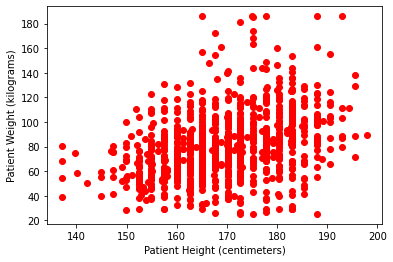

In [125]:
graficarDatos(X, y)

In [126]:
#No olvidarse agregar '1s' a la matriz de x
X = np.stack([np.ones(m), X], axis=1)

In [127]:
X

array([[  1. , 180.3],
       [  1. , 160. ],
       [  1. , 172.7],
       ...,
       [  1. , 160. ],
       [  1. , 162.6],
       [  1. , 165.1]])

In [128]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [129]:
theta=np.array([0.1, 0.5])
JJ = calcularCosto(X, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 0.5] se obtiene un costo de: 317.1943689499999


In [130]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

In [131]:
theta = np.zeros(2)

num_ite = 200000
alpha = 0.00006

theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

los valores de theta calculados son: [-3.10027935  0.49612997]
con un costo de: 308.94823406788186 


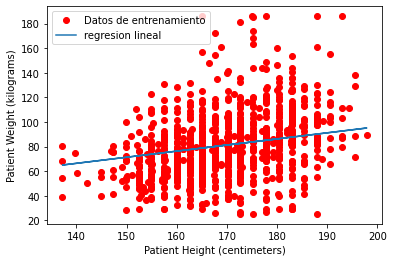

In [132]:
graficarDatos(X[:, 1], y)
pyplot.plot(X[:,1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [133]:
y_pred = np.dot([1, 194.3], theta)
print(y_pred)

93.29777395395402
